In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\USER\OneDrive\Documents\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
df.shape

(14999, 10)

In [5]:
left=df[df.left==1]

In [6]:
left.shape

(3571, 10)

out of 14999 employees 3571 employees were left the company

In [7]:
retained=df[df.left==0]

In [8]:
retained.shape

(11428, 10)

In [9]:
df.groupby('left').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_10180\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


the employee who left the company due to [satisfaction_level,average_montly_hours,promotion_last_5years]

In [10]:
#impact of employee salaries on retention

In [11]:
pd.crosstab(df.left,df.salary)

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


<Axes: xlabel='left'>

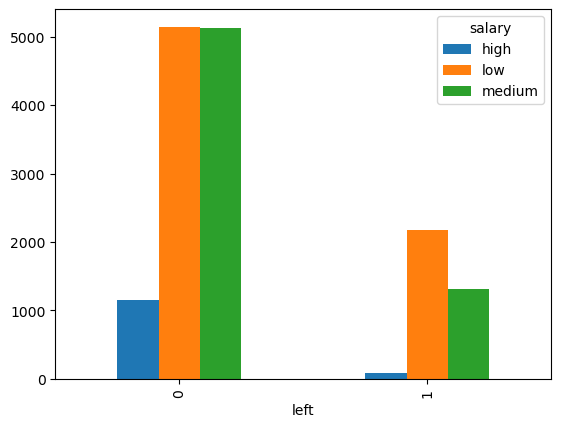

In [12]:
pd.crosstab(df.left,df.salary).plot(kind='bar')

employees having low salaries tend to leave the company

In [13]:
#corelation between department and employee retention

<Axes: xlabel='Department'>

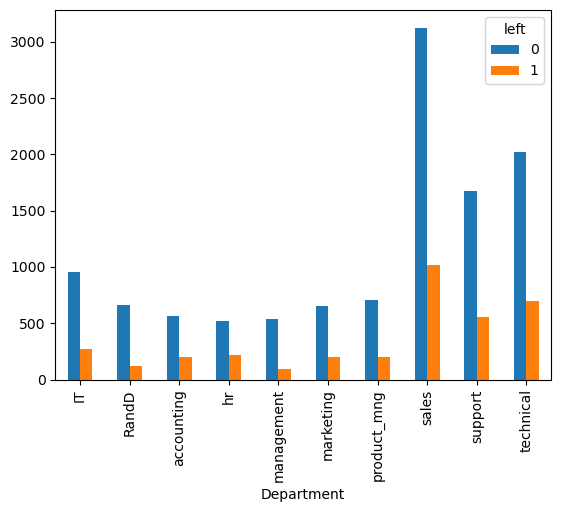

In [14]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

there is no relation between department and employee retention

In [15]:
new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [16]:
df_encoded=pd.get_dummies(df['salary'],prefix='salary')

In [17]:
df1=pd.concat([new_df,df_encoded],axis=1)

In [18]:
df1.drop('salary',inplace=True,axis=1)

In [19]:
df1.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [20]:
X=df1
y=df.left

In [21]:
print(X)

       satisfaction_level  average_montly_hours  promotion_last_5years  \
0                    0.38                   157                      0   
1                    0.80                   262                      0   
2                    0.11                   272                      0   
3                    0.72                   223                      0   
4                    0.37                   159                      0   
...                   ...                   ...                    ...   
14994                0.40                   151                      0   
14995                0.37                   160                      0   
14996                0.37                   143                      0   
14997                0.11                   280                      0   
14998                0.37                   158                      0   

       salary_high  salary_low  salary_medium  
0                0           1              0  
1              

In [22]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
model.score(X_test,y_test)

0.7734285714285715